# Description

This notebook calculates the binomial confidence of a given hypothsized single trial success probability ```p_success_hypothesis``` given the number of tests conducted ```n_trials``` and the number of successful tests ```n_successes``` out of these.

This tells you how confident you can be that the real success probability of a single test is ```p_success_hypothesis``` or better, and that you didn't just get ```n_successes``` out of ```n_trials``` by getting lucky and the real single test success probability (the one you would measure if you ran an infinite number of tests) being lower than your desired ```p_success_hypothesis```.

In addition to that the notebook produces a graph that tells you how confident you can be that the real single test success probability assumes any of the possible values between 0 (every test will fail) and 1 (no test will fail).

Note: all probabilities are given as numbers between 0 and 1, where 0 represents "never" and 1 represents 100% certainty.

# Parameters

In [70]:
n_trials = 100 #number of trials conducted
n_successes = 92 #number of successful trials
p_success_hypothesis = 0.9 #hypothesized success probability for which to calculate the confidence

round_to_digits = 4

# Evaluation

In [71]:
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc

mp.mp.dps = 50 #use 50 decimal digits precision in mpmath calculations

def binomial_distr(n_successes, p_success, n_trials):
    return mp.binomial(n_trials, n_successes) * mp.mpf(p_success)**n_successes * mp.mpf(1-p_success)**(n_trials-n_successes)

binomial_distr_vectorized = np.vectorize(binomial_distr) #create version of binomial distribution that can be evaluated for whole lists of inputs

def binomial_confidence(n_successes, p_success_hypothesis, n_trials):
    return 1-binomial_distr_vectorized(np.arange(n_successes, n_trials+1), p_success_hypothesis, n_trials).sum()

hypothesis_confidence = mp.nstr(binomial_confidence(n_successes, p_success_hypothesis, n_trials), round_to_digits)
null_hypothesis_confidence = mp.nstr(1-binomial_confidence(n_successes, p_success_hypothesis, n_trials), round_to_digits)


print('You have conducted {} test of which {} were successful'.format(n_trials, n_successes))
print('The probability of getting {} or more successful tests despite the success probability of a single test being {} or smaller is {}'.format(n_successes, p_success_hypothesis, null_hypothesis_confidence, round_to_digits))
print('Thefore, the confidence is {} that the success probability of a single test is at least {}'.format(hypothesis_confidence, p_success_hypothesis))

You have conducted 100 test of which 92 were successful
The probability of getting 92 or more successful tests despite the success probability of a single test being 0.9 or smaller is 0.3209
Thefore, the confidence is 0.6791 that the success probability of a single test is at least 0.9


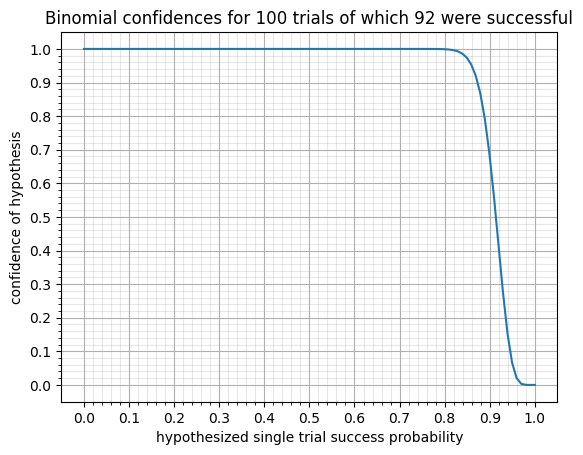

In [73]:
#create version of binomial confidence that can be evaluated for whole lists of hypothetical single trial success probabilities
binomial_confidence_vectorized = np.vectorize(binomial_confidence)

x = np.linspace(0, 1, 100) #list of possible single trial success probabilities
C_x = binomial_confidence_vectorized(n_successes, x, n_trials) #probabilities of each of these hypotheses

plt.plot(x, C_x)
plt.gca().set_title('Binomial confidences for {} trials of which {} were successful'.format(n_trials, n_successes))
plt.gca().set_xlabel('hypothesized single trial success probability'.format(n_trials))
plt.gca().set_ylabel('confidence of hypothesis')
plt.gca().tick_params(axis='x', which='minor', bottom=True)
plt.gca().set_xticks(np.linspace(0, 1, 11), minor=False)
plt.gca().set_xticks(np.linspace(0, 1, 51), minor=True)
plt.gca().set_yticks(np.linspace(0, 1, 11), minor=False)
plt.gca().set_yticks(np.linspace(0, 1, 51), minor=True)
plt.grid(which='major')
plt.grid(which='minor', alpha=0.3);